In [1]:
#Import all packages
import pandas as pd
import numpy as np
from pandas import Series, DataFrame

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [2]:
#Load the data set into Pandas
df = pd.read_csv('churn_clean.csv')
df.describe()

,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,Outage_sec_perweek,Email,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,49153.319600,38.757567,-90.782536,9756.562400,2.0877,53.078400,39806.926771,10.001848,12.016000,...,172.624816,3392.341550,3.490800,3.505100,3.487000,3.497500,3.492900,3.497300,3.509500,3.495600
std,2886.89568,27532.196108,5.437389,15.156142,14432.698671,2.1472,20.698882,28199.916702,2.976019,3.025898,...,42.943094,2185.294852,1.037797,1.034641,1.027977,1.025816,1.024819,1.033586,1.028502,1.028633
min,1.00000,601.000000,17.966120,-171.688150,0.000000,0.0000,18.000000,348.670000,0.099747,1.000000,...,79.978860,155.506715,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2500.75000,26292.500000,35.341828,-97.082812,738.000000,0.0000,35.000000,19224.717500,8.018214,10.000000,...,139.979239,1236.470827,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,5000.50000,48869.500000,39.395800,-87.918800,2910.500000,1.0000,53.000000,33170.605000,10.018560,12.000000,...,167.484700,3279.536903,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000
75%,7500.25000,71866.500000,42.106908,-80.088745,13168.000000,3.0000,71.000000,53246.170000,11.969485,14.000000,...,200.734725,5586.141370,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,10000.00000,99929.000000,70.640660,-65.667850,111850.000000,10.0000,89.000000,258900.700000,21.207230,23.000000,...,290.160419,7158.981530,7.000000,7.000000,8.000000,7.000000,7.000000,8.000000,7.000000,8.000000


In [3]:
#Rename the final 8 columns for better visibility
df.rename(columns = {'Item1' : 'TimelyResponse',
                     'Item2' : 'TimelyFixes',
                     'Item3' : 'TimelyReplacement',
                     'Item4' : 'Reliability',
                     'Item5' : 'Options',
                     'Item6' : 'RespectfulResponse',
                     'Item7' : 'CourteousExchange',
                     'Item8' : 'EvidenceOfListening'},
         inplace = True)

In [4]:
#Drop the less meaningul columns from the data set
df = df.drop(columns = ['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State', 'County', 'Zip', 'Lat', 'Lng',
                        'Population', 'Area', 'TimeZone', 'Job', 'Marital', 'Gender', 'Email', 'Port_modem', 'Tablet', 'PaperlessBilling', 
                        'PaymentMethod'])

In [5]:
#Search for missing data
df.isnull().sum()

Children                0
Age                     0
Income                  0
Churn                   0
Outage_sec_perweek      0
Contacts                0
Yearly_equip_failure    0
Techie                  0
Contract                0
InternetService         0
Phone                   0
Multiple                0
OnlineSecurity          0
OnlineBackup            0
DeviceProtection        0
TechSupport             0
StreamingTV             0
StreamingMovies         0
Tenure                  0
MonthlyCharge           0
Bandwidth_GB_Year       0
TimelyResponse          0
TimelyFixes             0
TimelyReplacement       0
Reliability             0
Options                 0
RespectfulResponse      0
CourteousExchange       0
EvidenceOfListening     0
dtype: int64

array([[<AxesSubplot:title={'center':'Children'}>,
        <AxesSubplot:title={'center':'Age'}>],
       [<AxesSubplot:title={'center':'Income'}>,
        <AxesSubplot:title={'center':'Outage_sec_perweek'}>],
       [<AxesSubplot:title={'center':'MonthlyCharge'}>,
        <AxesSubplot:title={'center':'Bandwidth_GB_Year'}>]], dtype=object)

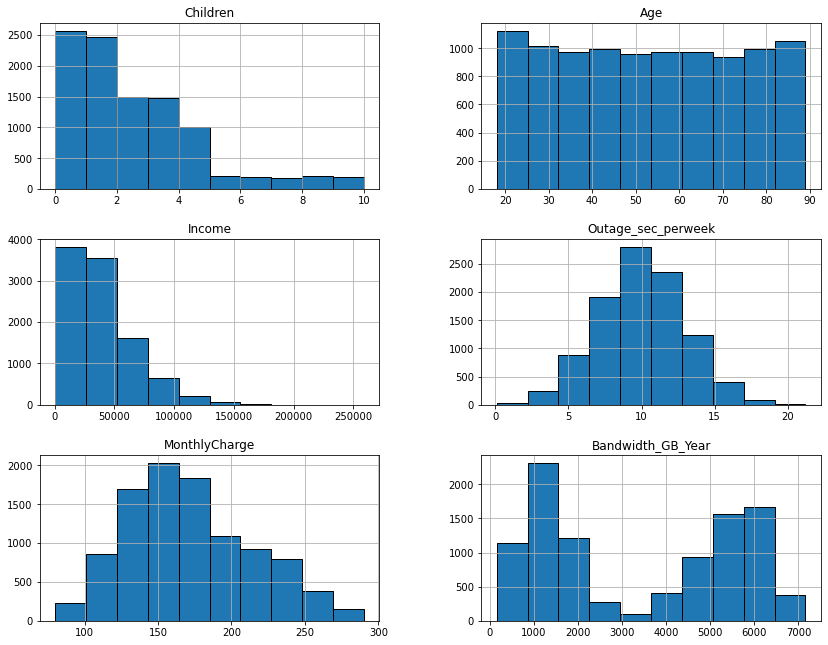

In [6]:
#Create histograms for some continuous variables
df[['Children', 'Age', 'Income', 'Outage_sec_perweek', 'MonthlyCharge', 'Bandwidth_GB_Year']].hist(ec = "black", figsize = (14, 11))
#plt.savefig('Histogram1.jpg')

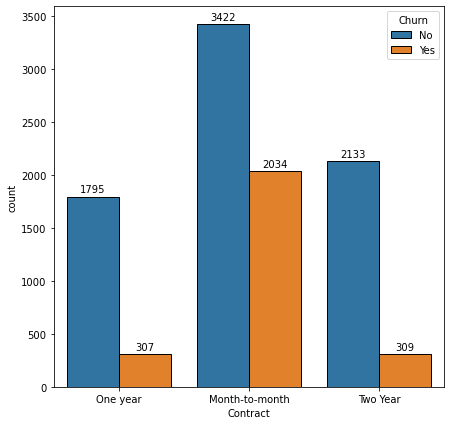

In [7]:
#Create a few seaborn plots for some categorical variables
ax = plt.subplots(figsize = (7, 7))
ax = sns.countplot(data = df, x = "Contract", hue = "Churn",
                   ec = "black")
for x in ax.patches:
    height = x.get_height()
    ax.text(x.get_x() + x.get_width() / 2, height + 40, height, ha = "center")
#plt.savefig('Contract.jpg')

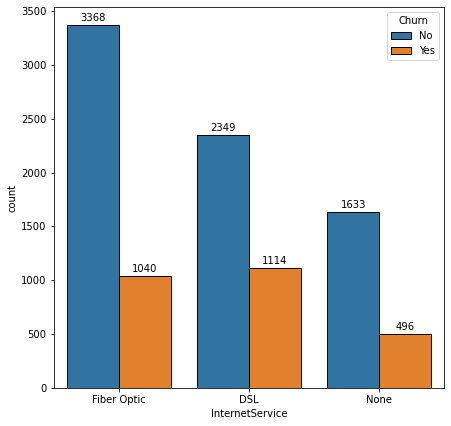

In [8]:
#Create a few seaborn plots for some categorical variables (1)(2)
ax = plt.subplots(figsize = (7, 7))
ax = sns.countplot(data = df, x = "InternetService", hue = "Churn",
                   ec = "black")
for x in ax.patches:
    height = x.get_height()
    ax.text(x.get_x() + x.get_width() / 2, height + 40, height, ha = "center")
#plt.savefig('ISP.jpg')

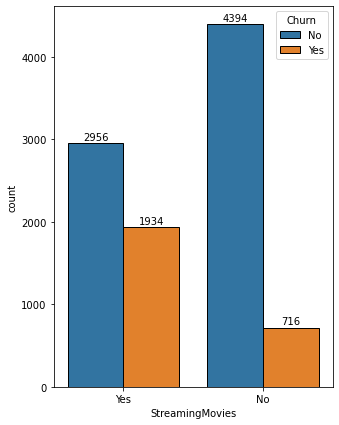

In [9]:
#Create a few seaborn plots for some categorical variables (1)(2)
ax = plt.subplots(figsize = (5, 7))
ax = sns.countplot(data = df, x = "StreamingMovies", hue = "Churn", order = ['Yes', 'No'],
                   ec = "black")
for x in ax.patches:
    height = x.get_height()
    ax.text(x.get_x() + x.get_width() / 2, height + 40, height, ha = "center")
#plt.savefig('Movie.jpg')

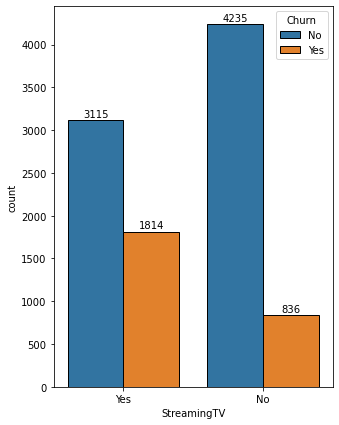

In [10]:
#Create a few seaborn plots for some categorical variables (1)(2)
ax = plt.subplots(figsize = (5, 7))
ax = sns.countplot(data = df, x = "StreamingTV", hue = "Churn", order = ['Yes', 'No'],
                   ec = "black")
for x in ax.patches:
    height = x.get_height()
    ax.text(x.get_x() + x.get_width() / 2, height + 40, height, ha = "center")
#plt.savefig('TV.jpg')

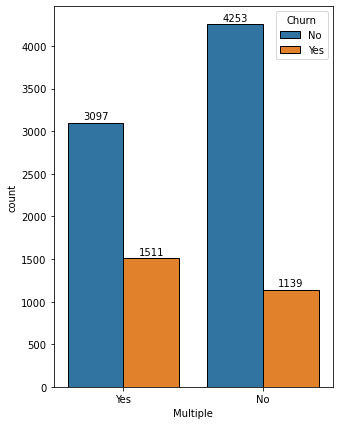

In [11]:
#Create a few seaborn plots for some categorical variables (1)(2)
ax = plt.subplots(figsize = (5, 7))
ax = sns.countplot(data = df, x = "Multiple", hue = "Churn", order = ['Yes', 'No'],
                   ec = "black")
for x in ax.patches:
    height = x.get_height()
    ax.text(x.get_x() + x.get_width() / 2, height + 40, height, ha = "center")
#plt.savefig('Multiple.jpg')

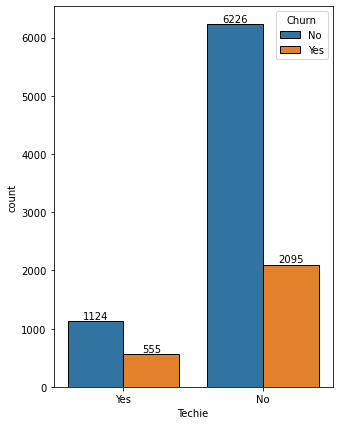

In [12]:
#Create a few seaborn plots for some categorical variables (1)(2)
ax = plt.subplots(figsize = (5, 7))
ax = sns.countplot(data = df, x = "Techie", hue = "Churn", order = ['Yes', 'No'],
                   ec = "black")
for x in ax.patches:
    height = x.get_height()
    ax.text(x.get_x() + x.get_width() / 2, height + 40, height, ha = "center")
#plt.savefig('Techie.jpg')

In [13]:
#See which variables are categorical
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Children              10000 non-null  int64  
 1   Age                   10000 non-null  int64  
 2   Income                10000 non-null  float64
 3   Churn                 10000 non-null  object 
 4   Outage_sec_perweek    10000 non-null  float64
 5   Contacts              10000 non-null  int64  
 6   Yearly_equip_failure  10000 non-null  int64  
 7   Techie                10000 non-null  object 
 8   Contract              10000 non-null  object 
 9   InternetService       10000 non-null  object 
 10  Phone                 10000 non-null  object 
 11  Multiple              10000 non-null  object 
 12  OnlineSecurity        10000 non-null  object 
 13  OnlineBackup          10000 non-null  object 
 14  DeviceProtection      10000 non-null  object 
 15  TechSupport         

In [14]:
#No missing data, now to use ordinal encoding to replace the categorical values with numeric ones
#Yes to 1, No to 0
df['Churn_num'] = df['Churn']
df['Techie_num'] = df['Techie']
df['Contract_num'] = df['Contract']
df['InternetService_num'] = df['InternetService']
df['Phone_num'] = df['Phone']
df['Multiple_num'] = df['Multiple']
df['OnlineSecurity_num'] = df['OnlineSecurity']
df['OnlineBackup_num'] = df['OnlineBackup']
df['DeviceProtection_num'] = df['DeviceProtection']
df['TechSupport_num'] = df['TechSupport']
df['StreamingTV_num'] = df['StreamingTV']
df['StreamingMovies_num'] = df['StreamingMovies']

In [15]:
#Set up dictionary for converting to numeric values
dict_churn = {"Churn_num" : {"Yes" : 1, "No" : 0}}
dict_techie = {"Techie_num" : {"Yes" : 1, "No" : 0}}
dict_phone = {"Phone_num" : {"Yes" : 1, "No" : 0}}
dict_multiple = {"Multiple_num" : {"Yes" : 1, "No" : 0}}
dict_security = {"OnlineSecurity_num" : {"Yes" : 1, "No" : 0}}
dict_backup = {"OnlineBackup_num" : {"Yes" : 1, "No" : 0}}
dict_protection = {"DeviceProtection_num" : {"Yes" : 1, "No" : 0}}
dict_tech = {"TechSupport_num" : {"Yes" : 1, "No" : 0}}
dict_tv = {"StreamingTV_num" : {"Yes" : 1, "No" : 0}}
dict_movie = {"StreamingMovies_num" : {"Yes" : 1, "No" : 0}}

dict_contract = {"Contract_num" : {"Month-to-month" : 0, "One year" : 1, "Two Year" : 2}}
dict_isp = {"InternetService_num" : {"None" : 0, "DSL" : 1, "Fiber Optic" : 2}}

In [16]:
#Replace the variables values
df.replace(dict_churn, inplace = True)
df.replace(dict_techie, inplace = True)
df.replace(dict_phone, inplace = True)
df.replace(dict_multiple, inplace = True)
df.replace(dict_security, inplace = True)
df.replace(dict_backup, inplace = True)
df.replace(dict_protection, inplace = True)
df.replace(dict_tech, inplace = True)
df.replace(dict_tv, inplace = True)
df.replace(dict_movie, inplace = True)

df.replace(dict_contract, inplace = True)
df.replace(dict_isp, inplace = True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 41 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Children              10000 non-null  int64  
 1   Age                   10000 non-null  int64  
 2   Income                10000 non-null  float64
 3   Churn                 10000 non-null  object 
 4   Outage_sec_perweek    10000 non-null  float64
 5   Contacts              10000 non-null  int64  
 6   Yearly_equip_failure  10000 non-null  int64  
 7   Techie                10000 non-null  object 
 8   Contract              10000 non-null  object 
 9   InternetService       10000 non-null  object 
 10  Phone                 10000 non-null  object 
 11  Multiple              10000 non-null  object 
 12  OnlineSecurity        10000 non-null  object 
 13  OnlineBackup          10000 non-null  object 
 14  DeviceProtection      10000 non-null  object 
 15  TechSupport         

In [18]:
#Now that we have those as numeric, we can drop the original columns
df = df.drop(columns = ['Churn', 'Techie', 'Phone', 'Multiple', 'OnlineSecurity','OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies','Contract', 'InternetService'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Children              10000 non-null  int64  
 1   Age                   10000 non-null  int64  
 2   Income                10000 non-null  float64
 3   Outage_sec_perweek    10000 non-null  float64
 4   Contacts              10000 non-null  int64  
 5   Yearly_equip_failure  10000 non-null  int64  
 6   Tenure                10000 non-null  float64
 7   MonthlyCharge         10000 non-null  float64
 8   Bandwidth_GB_Year     10000 non-null  float64
 9   TimelyResponse        10000 non-null  int64  
 10  TimelyFixes           10000 non-null  int64  
 11  TimelyReplacement     10000 non-null  int64  
 12  Reliability           10000 non-null  int64  
 13  Options               10000 non-null  int64  
 14  RespectfulResponse    10000 non-null  int64  
 15  CourteousExchange   

In [19]:
#Extract prepared dataset
df.to_csv('churn_prepared.csv')